# MLP Regressor trained with the California housing dataset

## Setup

In [1]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Import the SSL module and configure certificate verification to be optional to avoid SSLCertVerificationError.
import ssl
ssl.SSLContext.verify_mode = ssl.VerifyMode.CERT_OPTIONAL

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Load, split and scale the dataset

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# We could scale the features using SciKitLearn's StandardScaler or MinMaxScaler,
# but in this example we will use the Keras Normalization Layer instead.
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_valid = scaler.transform(X_valid)
#X_test = scaler.transform(X_test)

In [3]:
# Display the feature names.
# Note that this dataset is not exactly the same as the "housing" dataset used in chapter 2.
# As a result, we cannot completely compare the RMSE of this model with the RMSEs of the
# other models that we trained and tested using the dataset from chapter 2.
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
# Computing the mean median_house_value.
# We can see that the target value have been scaled down by a factor of 100000
# compared to the Housing dataset used in chapter 2.

In [5]:
housing.data.shape

(20640, 8)

## Build, compile, train and evaluate a model

In [6]:
# Build a model.
# We don't need to specify an input layer, since we don't need to convert the input array.
# For regression problems, we don't use an activation function in the output layer.

# Keras Normalization Layer. See:
#   https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization
norm_layer = keras.layers.Normalization(axis=1)

model = keras.models.Sequential([
    norm_layer,
    # hidden layers
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    # output layer
    keras.layers.Dense(1)
])

# Compile the model.
# For regression problems, we use the "mean_squared_error" as loss function.
model.compile(loss="mse", optimizer="sgd", metrics=["RootMeanSquaredError"])

# Normalize inputs.
norm_layer.adapt(X_train)

2023-09-20 11:44:19.688531: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [7]:
# Train the model.
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 0s 727us/step - loss: 1.4449 - root_mean_squared_error: 1.2020 - val_loss: 1.3261 - val_root_mean_squared_error: 1.1516
Epoch 2/40
363/363 [==============================] - 0s 469us/step - loss: 1.3476 - root_mean_squared_error: 1.1608 - val_loss: 1.3213 - val_root_mean_squared_error: 1.1495
Epoch 3/40
363/363 [==============================] - 0s 671us/step - loss: 1.3468 - root_mean_squared_error: 1.1605 - val_loss: 1.3136 - val_root_mean_squared_error: 1.1461
Epoch 4/40
363/363 [==============================] - 0s 466us/step - loss: 1.3454 - root_mean_squared_error: 1.1599 - val_loss: 1.3624 - val_root_mean_squared_error: 1.1672
Epoch 5/40
363/363 [==============================] - 0s 472us/step - loss: 1.3455 - root_mean_squared_error: 1.1600 - val_loss: 1.3224 - val_root_mean_squared_error: 1.1499
Epoch 6/40
363/363 [==============================] - 0s 465us/step - loss: 1.3444 - root_mean_squared_error: 1.1595 - val_loss: 1

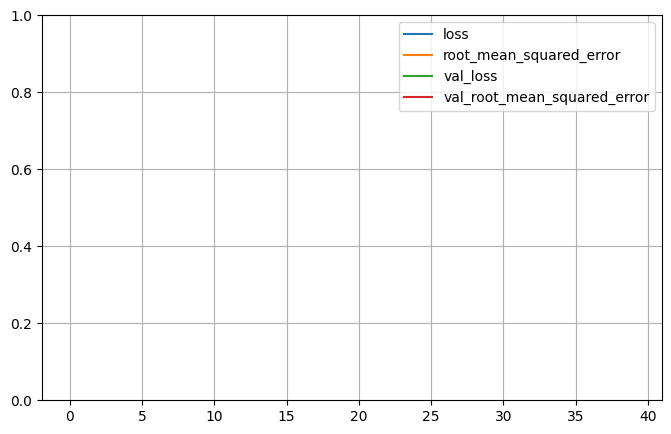

In [8]:
# Show the learning curves.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
# Evaluate the model (outputs the MSE).
loss = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 340us/step - loss: 1.3121 - root_mean_squared_error: 1.1455


<b>Observation:</b><br/>
If we multipy the RMSE with 100000, we get the RMSE expressed in USD.

In [10]:
# Make predictions for the first 3 instances in the test set.
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 44ms/step


array([[1.9688934],
       [1.9747473],
       [2.0151205]], dtype=float32)

In [11]:
# Compare with the corresponding values target values
y_test[:3]

array([0.477  , 0.458  , 5.00001])

<b>Observation:</b><br/>
The second prediction is very bad given the RMSE. The other two predictions are okay.